In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
foggy = "weather/foggy"
sunrise = "weather/sunrise"
shine = "weather/shine"
rainy = "weather/rainy"
cloudy = "weather/cloudy"
test = "weather/alien_test"

In [3]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [4]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x, y

In [5]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 359.31it/s]


In [6]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

In [ ]:
import seaborn as sns
plt.figure(figsize=(4,3))
plt.style.use("fivethirtyeight")
sns.countplot(y)
plt.show()


In [ ]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(1498,)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [10]:
y_test.shape

(300,)

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [12]:
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

In [14]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

In [15]:
for layer in vgg.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 40965     
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [19]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [4792 1198]


In [18]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1)

Epoch 1/15
38/38 [==============================] - 8s 198ms/step - loss: 1.0394 - accuracy: 0.5943 - val_loss: 0.6095 - val_accuracy: 0.7667
Epoch 2/15
38/38 [==============================] - 6s 146ms/step - loss: 0.4690 - accuracy: 0.8639 - val_loss: 0.4340 - val_accuracy: 0.8733
Epoch 3/15
38/38 [==============================] - 6s 147ms/step - loss: 0.3389 - accuracy: 0.9107 - val_loss: 0.4219 - val_accuracy: 0.8667
Epoch 4/15
38/38 [==============================] - 6s 147ms/step - loss: 0.2822 - accuracy: 0.9299 - val_loss: 0.3905 - val_accuracy: 0.8733
Epoch 5/15
38/38 [==============================] - 6s 147ms/step - loss: 0.2188 - accuracy: 0.9566 - val_loss: 0.3416 - val_accuracy: 0.8733
Epoch 6/15
38/38 [==============================] - 6s 147ms/step - loss: 0.1933 - accuracy: 0.9558 - val_loss: 0.3899 - val_accuracy: 0.8800
Epoch 7/15
38/38 [==============================] - 6s 148ms/step - loss: 0.1591 - accuracy: 0.9641 - val_loss: 0.3183 - val_accuracy: 0.8867
Epoch 

In [5]:
classes = ['cloudy', 'foggy', 'rainy', 'sunshine', 'sunrise']

foggy


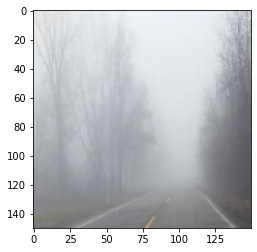

In [7]:
from tensorflow.keras.preprocessing import image
img = image.load_img("foggy.png",target_size=(150, 150))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(classes[np.argmax(output)])

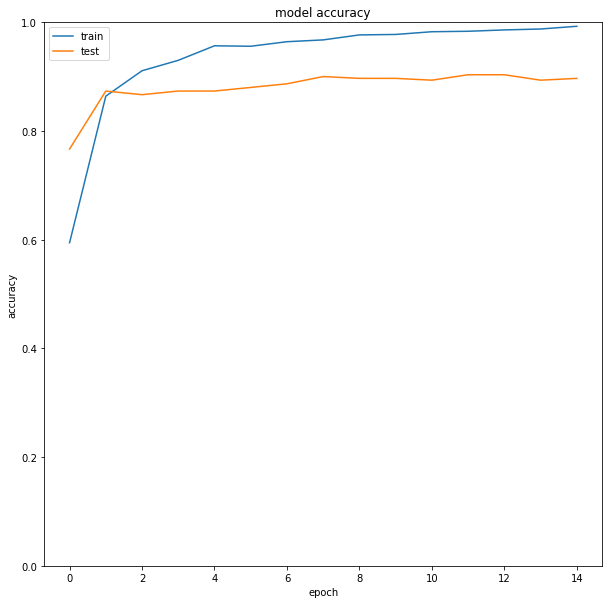

In [19]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.0])
plt.show()